In [1]:
import pandas as pd
import numpy as np

In [32]:
labels = pd.read_csv('train.csv')

In [33]:
labels.head()

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


In [34]:
labels = labels.values

In [35]:
print(labels.shape)

(304, 2)


In [43]:
l = labels[0, 0]
print(l)
print(type(l))

296.jpg
<class 'str'>


In [36]:
my_dict = {
    'Pikachu': 0,
    'Bulbasaur': 1,
    'Charmander': 2
}

In [37]:
import matplotlib.pyplot as plt
from pathlib import Path

In [38]:
import cv2
import os

In [218]:
images = []
label_img = []
dataset_path = "./Images/"
c = 0

for i in range(labels.shape[0]):
    img_path = labels[i, 0]
    label = labels[i, 1]
    img = cv2.imread(dataset_path + img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32))
    images.append(img)
    label_img.append(my_dict[label])

In [219]:
# TRAINING DATA (NORMALIZED)
images = np.array(images, dtype = 'float32') / 255.0
label_img = np.array(label_img)

In [220]:
print(images[0])

[[[0.57254905 0.7490196  0.9137255 ]
  [0.57254905 0.7490196  0.9098039 ]
  [0.5764706  0.7529412  0.9137255 ]
  ...
  [0.5921569  0.7647059  0.91764706]
  [0.58431375 0.75686276 0.9098039 ]
  [0.5764706  0.7529412  0.9137255 ]]

 [[0.57254905 0.7490196  0.9098039 ]
  [0.5803922  0.75686276 0.91764706]
  [0.58431375 0.7529412  0.9137255 ]
  ...
  [0.59607846 0.76862746 0.9137255 ]
  [0.5921569  0.7647059  0.91764706]
  [0.58431375 0.75686276 0.9098039 ]]

 [[0.5764706  0.7529412  0.9137255 ]
  [0.58431375 0.7529412  0.91764706]
  [0.5882353  0.75686276 0.9098039 ]
  ...
  [0.6039216  0.76862746 0.91764706]
  [0.6        0.76862746 0.9137255 ]
  [0.5921569  0.7647059  0.91764706]]

 ...

 [[0.32156864 0.54901963 0.8352941 ]
  [0.30980393 0.54509807 0.827451  ]
  [0.30980393 0.5372549  0.827451  ]
  ...
  [0.2901961  0.5254902  0.8117647 ]
  [0.2901961  0.5254902  0.8117647 ]
  [0.2901961  0.5254902  0.8117647 ]]

 [[0.3137255  0.54901963 0.83137256]
  [0.30980393 0.54509807 0.827451  ]


In [221]:
print(images.shape)

(304, 64, 64, 3)


In [222]:
print(label_img.shape)

(304,)


In [223]:
import random

combined = list(zip(images,label_img))
random.shuffle(combined)

#Unzip
images[:],label_img[:] = zip(*combined)

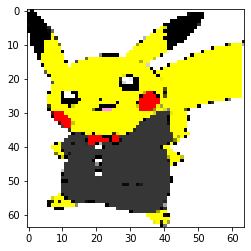

0


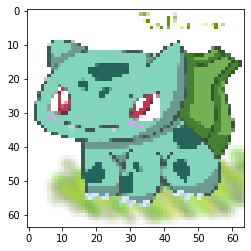

1


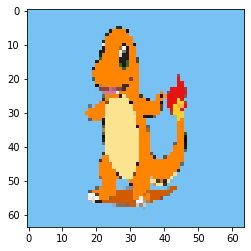

2


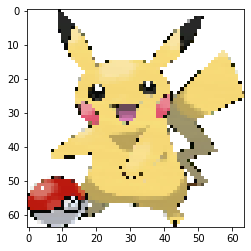

0


In [224]:
for i in range(1, 5):
    plt.imshow(images[i])
    plt.show()
    print(label_img[i])

In [225]:
# SVM

In [226]:
class SVM:
    
    def __init__(self, C = 1.0):
        self.C = C
        self.W = 0
        self.B = 0
        
    def hinge_loss(self, W, b, X, Y):
        loss = 0.0
        
        loss += 0.5 * np.dot(W, W.T)
        
        m = X.shape[0]
        for i in range(m):
            ti = Y[i] * (np.dot(W, X[i].T) + b)
            loss += self.C * max(0, 1-ti)
            
        return loss[0][0]
    
    def train(self, X, Y, batch_size = 50, learning_rate = 0.001, maxItr = 300):
        no_of_samples = X.shape[0]
        no_of_features = X.shape[1]
        
        lr = learning_rate
        c = self.C
        
        W = np.zeros((1, no_of_features))
        bias = 0
        
        losses = []
        for i in range(maxItr):
            l = self.hinge_loss(W, bias, X, Y)
            losses.append(l)
            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0, no_of_samples, batch_size):
                gradw = 0
                gradb = 0
                
                for j in range(batch_start, batch_start + batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        ti = Y[i] * (np.dot(W, X[i].T) + bias)
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c * Y[i] * X[i]
                            gradb += c * Y[i]
                
                W = W - lr*W + lr*gradw
                bias = bias + lr*gradb
        
        self.W = W
        self.B = bias
        
        return W, bias, losses

In [227]:
images = images.reshape(images.shape[0], -1)
print(images.shape)
print(label_img.shape)

(304, 12288)
(304,)


In [228]:
CLASSES = len(np.unique(label_img))
print(CLASSES)

3


In [229]:
data = {}
def classWiseData(X, Y):
    
    for i in range(CLASSES):
        data[i] = []
        
    for i in range(X.shape[0]):
        data[Y[i]].append(X[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [230]:
data = classWiseData(images, label_img)

In [231]:
def getDataPairForSVM(d1, d2):
    l1 = d1.shape[0]
    l2 = d2.shape[0]
    
    samples = l1 + l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples, features))
    data_pair_labels = np.zeros((samples, ))
    
    data_pair[:l1, :] = d1
    data_pair[l1:, :] = d2
    
    data_pair_labels[:l1] = -1
    data_pair_labels[l1:] = +1
    
    return data_pair, data_pair_labels

In [232]:
# TRAINING

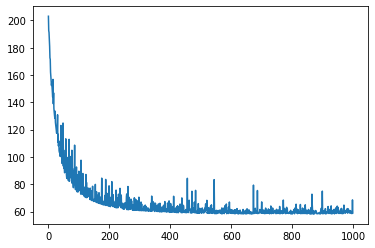

In [233]:
mySvm = SVM()
Xp, Yp = getDataPairForSVM(data[0], data[2])
W, b, loss = mySvm.train(Xp, Yp, learning_rate = 0.00001, maxItr = 1000)
plt.plot(loss)
plt.show()

In [234]:
print(loss[0])
print(loss[-1])

203.0
59.005097897888774


In [235]:
def trainSvms(X, Y):
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1, CLASSES):
            Xp, Yp = getDataPairForSVM(data[i], data[j])
            W, b, loss = mySvm.train(Xp, Yp, learning_rate = 0.00001, maxItr = 1000)
            svm_classifiers[i][j] = (W, b)
            
            plt.plot(loss)
            plt.show()
            
    return svm_classifiers

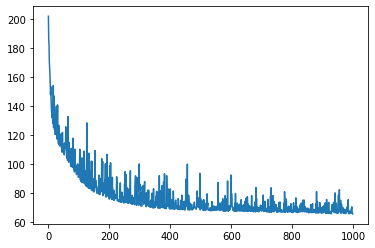

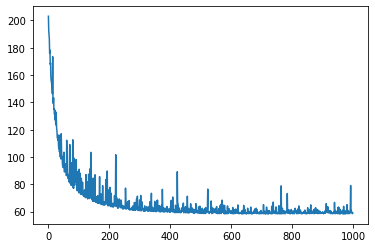

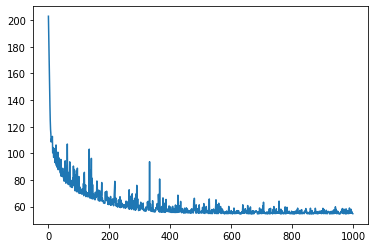

In [236]:
svm_classifiers = trainSvms(images, label_img)

In [237]:
# PREDICTION

In [238]:
def binaryPredict(x, w, b):
    z = np.dot(x, w.T) + b
    if z >= 0:
        return 1
    else:
        return -1

In [239]:
def predict(x):
    count = np.zeros((CLASSES, ))
    
    for i in range(CLASSES):
        for j in range(i+1, CLASSES):
            
            w, b = svm_classifiers[i][j]
            z = binaryPredict(x, w, b)
            
            if z == 1:
                count[j] += 1
            else:
                count[i] += 1
                
    final_prediction = np.argmax(count)
    return final_prediction


In [240]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [241]:
print(accuracy(images,label_img))

0.7467105263157895


In [242]:
# TESTING

In [248]:
X_test = pd.read_csv('test.csv')

In [249]:
X_test.head()

,ImageId
0,1106.jpg
1,2236.jpg
2,1131.jpg
3,2221.jpg
4,2011.jpg


In [253]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [254]:
X_test = X_test.values

In [255]:

# pred = []
test_images = []
data_set = './Images_test/'

for i in range(X_test.shape[0]):
    img_path = X_test[i][0]
    
    img = cv2.imread(data_set + img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32))
    
    test_images.append(img)

In [256]:
test_images = np.array(test_images, dtype = 'float32') / 255.0
test_images = test_images.reshape(test_images.shape[0], -1)
print(test_images.shape)

(123, 12288)


In [257]:
my_dict2 = {
    0: 'Pikachu',
    1: 'Bulbasaur',
    2: 'Charmander'
}

In [258]:
pred = []
for i in range(test_images.shape[0]):
    p = predict(test_images[i])
    # print(len(p))
    pred.append(my_dict2[p])

In [259]:
print(len(pred))

123


In [260]:
# print(pred)

In [261]:
pred = np.array(pred)

In [262]:
print(type(X_test))

<class 'numpy.ndarray'>


In [263]:
pred = pred.reshape((pred.shape[0], ))

In [264]:
print(pred.shape)

(123,)


In [265]:
X_la = X_test[:, 0]
X_la = X_la.reshape(X_test.shape[0], )
print(X_la.shape)

(123,)


In [266]:

ans = np.stack((X_la, pred)).T
print(ans.shape)

(123, 2)


In [267]:
df = pd.DataFrame(ans, columns = ["ImageId", "NameOfPokemon"])

In [268]:
df.to_csv('answer.csv', index = False)